In [1]:

# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
import pandas as pd
import numpy as np
from prophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import calendar
from datetime import datetime
from prophet.diagnostics import performance_metrics



/home/sam/Documents/projects/practice/general/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### For Cluster 0

In [2]:
def change_date_format(date_string, new_format):

    parts = date_string.split('/')
    if len(parts) != 3:
        parts = date_string.split('-')
    if len(parts) != 3:
        print("Error: Invalid date format")
        return None

    try:
        for i in parts:
            if int(i) > 40:
                year = int(i)
            
        
        month = int(parts[1])

        

        # Create a new datetime object with the adjusted day value
        # days_in_month = calendar.monthrange(year, month)[1]
        date = datetime(year, month, 1)

        # Convert the new datetime object to the desired format
        new_date_string = date.strftime(new_format)
        return new_date_string
    except (ValueError, OverflowError) as e:
        print(f"Error: {e}")
        return None

In [15]:
TEST_SIZE = -12

In [24]:
def fb_prohet(path):
    df = read_csv(path, header=0)

    # prepare expected column names
    # df.columns = ['ds', 'y']
    # df['ds'] = df.apply(lambda x: change_date_format(x.ds, '%Y-%m-%d'), axis=1)

    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')

    train = df.iloc[:TEST_SIZE]
    test = df.iloc[TEST_SIZE:]

    # create test dataset, remove last 3 months
    # train = df.drop(df.index[TEST_SIZE:])
    print(train.tail())
    print(test.head())
    # define the model
    model = Prophet()
    # model = Prophet(seasonality_mode='multiplicative')
    # fit the model
    model.fit(train)
    # define the period for which we want a prediction
    # future = list()
    # for i in range(1, (TEST_SIZE*-1) + 1):
    #     date = '2016-%01d' % i
    #     future.append([date])
    future = test["ds"].to_list()
    future = DataFrame(future)
    future.columns = ['ds']
    future['ds'] = to_datetime(future['ds'])

        
    
    # use the model to make a forecast
    forecast = model.predict(future)
    # calculate MAE between expected and predicted values for december
    y_true = df['y'][TEST_SIZE:].values
    y_pred = forecast['yhat'].values
    # print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    mae = mean_absolute_error(y_true, y_pred)
    print('MAE: %.3f' % mae)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print('RMSE: %.3f' % rmse)
    # plot expected vs actual
    pyplot.plot(y_true, label='Actual')
    pyplot.plot(y_pred, label='Predicted')
    pyplot.legend()
    pyplot.show()

14:32:12 - cmdstanpy - INFO - Chain [1] start processing


14:32:13 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1800
32 2014-09-01  1700
33 2014-10-01  2300
34 2014-11-01  2400
35 2014-12-01  2200
           ds     y
36 2015-01-01  1250
37 2015-02-01  1100
38 2015-03-01  1400
39 2015-04-01   600
40 2015-05-01   250
MAE: 222.861
RMSE: 270.099


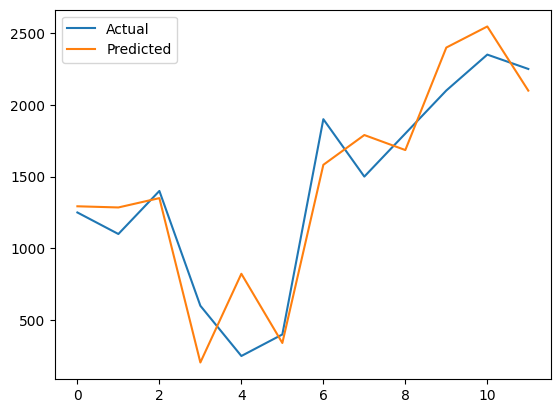

In [25]:
fb_prohet('../data/new_single_cluster_0.csv')


14:32:13 - cmdstanpy - INFO - Chain [1] start processing


14:32:13 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1531
32 2014-09-01  1675
33 2014-10-01  2218
34 2014-11-01  2147
35 2014-12-01  2334
           ds     y
36 2015-01-01  1314
37 2015-02-01  1185
38 2015-03-01  1426
39 2015-04-01   392
40 2015-05-01   563
MAE: 149.258
RMSE: 160.983


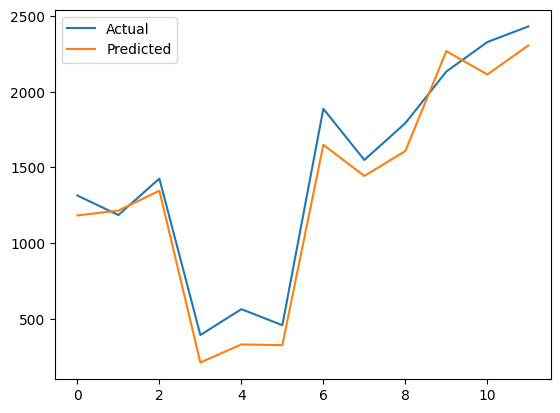

In [26]:
fb_prohet('../data/new_single_cluster_00.csv')


14:32:13 - cmdstanpy - INFO - Chain [1] start processing


14:32:13 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1723
32 2014-09-01  1854
33 2014-10-01  2139
34 2014-11-01  2391
35 2014-12-01  2346
           ds     y
36 2015-01-01  1408
37 2015-02-01  1129
38 2015-03-01  1327
39 2015-04-01   487
40 2015-05-01   637
MAE: 124.419
RMSE: 161.511


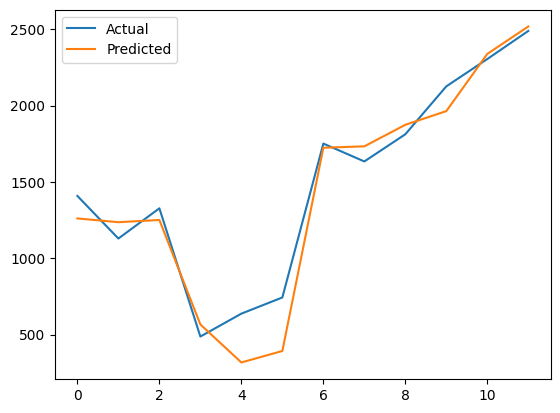

In [27]:
fb_prohet('../data/new_single_cluster_000.csv')


14:32:14 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
31 2014-08-01  1764
32 2014-09-01  1837
33 2014-10-01  2193
34 2014-11-01  2216
35 2014-12-01  2398
           ds     y
36 2015-01-01  1345
37 2015-02-01  1197
38 2015-03-01  1212
39 2015-04-01   472
40 2015-05-01   625


14:32:14 - cmdstanpy - INFO - Chain [1] done processing


MAE: 168.742
RMSE: 203.991


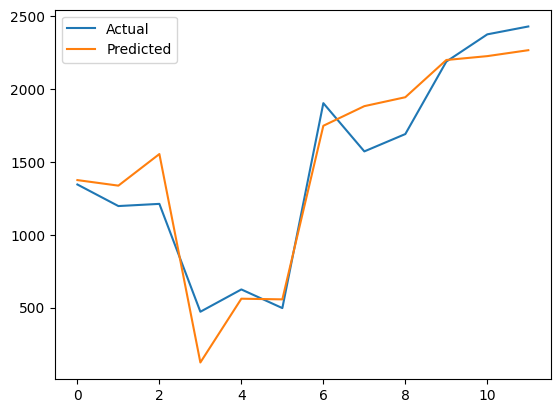

In [28]:
fb_prohet('../data/new_single_cluster_0000.csv')


14:32:15 - cmdstanpy - INFO - Chain [1] start processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1785
32 2014-09-01  1612
33 2014-10-01  2245
34 2014-11-01  2408
35 2014-12-01  2193
           ds     y
36 2015-01-01  1435
37 2015-02-01  1218
38 2015-03-01  1369
39 2015-04-01   364
40 2015-05-01   489
MAE: 147.894
RMSE: 186.065


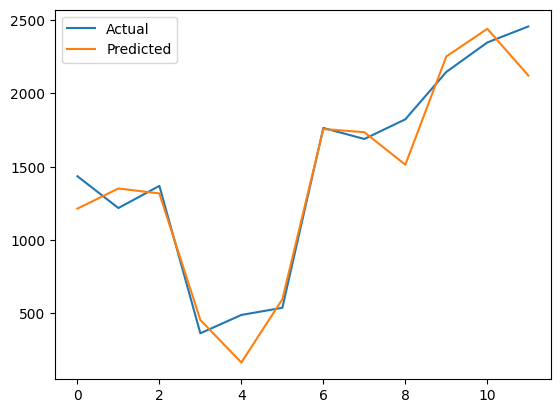

In [29]:
fb_prohet('../data/new_single_cluster_00000.csv')

### For Clustring 1

14:32:19 - cmdstanpy - INFO - Chain [1] start processing


14:32:19 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1381
32 2014-09-01  1475
33 2014-10-01  2018
34 2014-11-01  1947
35 2014-12-01  2134
           ds     y
36 2015-01-01  1114
37 2015-02-01  1085
38 2015-03-01  1226
39 2015-04-01   292
40 2015-05-01   463
MAE: 59.671
RMSE: 74.290


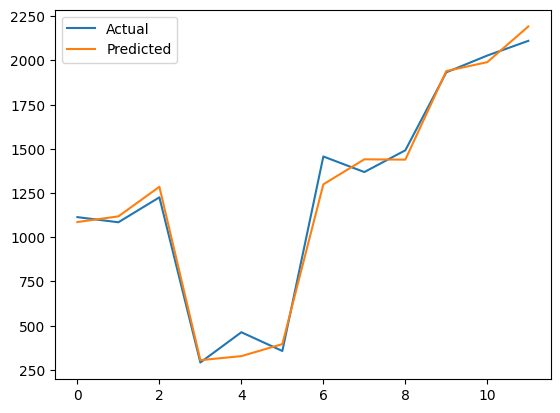

In [30]:
fb_prohet('../data/new_single_cluster_1.csv')


14:32:20 - cmdstanpy - INFO - Chain [1] start processing
14:32:20 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1423
32 2014-09-01  1554
33 2014-10-01  2139
34 2014-11-01  2091
35 2014-12-01  1946
           ds     y
36 2015-01-01  1218
37 2015-02-01  1129
38 2015-03-01  1327
39 2015-04-01   287
40 2015-05-01   337
MAE: 69.635
RMSE: 85.060


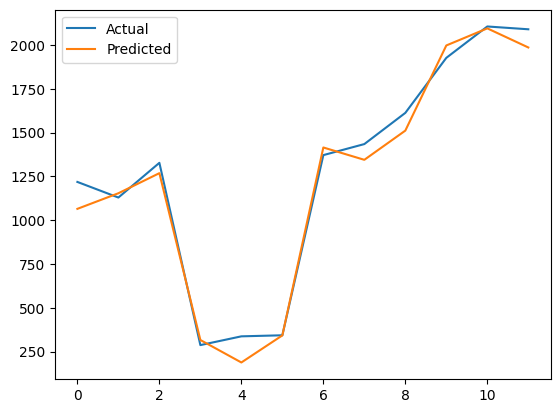

In [31]:
fb_prohet('../data/new_single_cluster_11.csv')


14:32:26 - cmdstanpy - INFO - Chain [1] start processing


14:32:26 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1464
32 2014-09-01  1737
33 2014-10-01  2093
34 2014-11-01  2116
35 2014-12-01  1998
           ds     y
36 2015-01-01  1345
37 2015-02-01  1097
38 2015-03-01  1212
39 2015-04-01   372
40 2015-05-01   425
MAE: 133.501
RMSE: 157.296


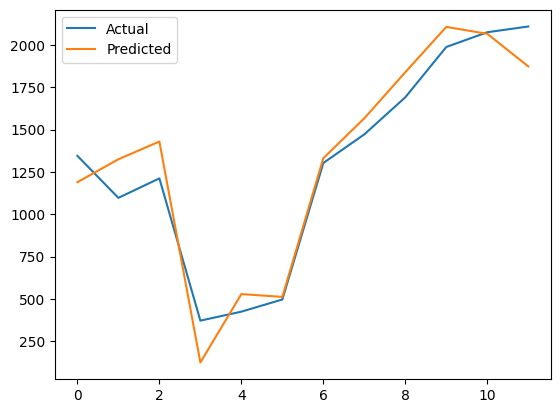

In [32]:
fb_prohet('../data/new_single_cluster_111.csv')


14:32:26 - cmdstanpy - INFO - Chain [1] start processing


14:32:26 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1385
32 2014-09-01  1612
33 2014-10-01  2245
34 2014-11-01  2108
35 2014-12-01  1993
           ds     y
36 2015-01-01  1335
37 2015-02-01  1118
38 2015-03-01  1369
39 2015-04-01   264
40 2015-05-01   489
MAE: 104.850
RMSE: 122.927


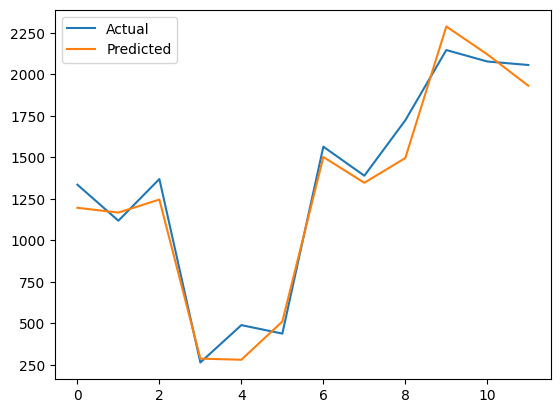

In [33]:
fb_prohet('../data/new_single_cluster_1111.csv')


14:32:27 - cmdstanpy - INFO - Chain [1] start processing
14:32:27 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1253
32 2014-09-01  1573
33 2014-10-01  2034
34 2014-11-01  2009
35 2014-12-01  2165
           ds     y
36 2015-01-01  1156
37 2015-02-01  1087
38 2015-03-01  1346
39 2015-04-01   292
40 2015-05-01   395
MAE: 74.706
RMSE: 90.361


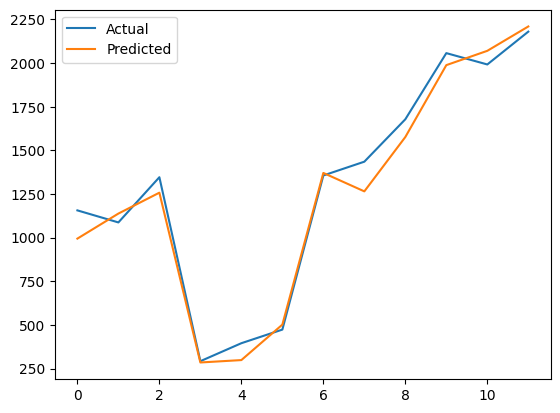

In [34]:
fb_prohet('../data/new_single_cluster_11111.csv')

### For cluster 2

14:32:29 - cmdstanpy - INFO - Chain [1] start processing


14:32:29 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1881
32 2014-09-01  1975
33 2014-10-01  2718
34 2014-11-01  2847
35 2014-12-01  2834
           ds     y
36 2015-01-01  1814
37 2015-02-01  1585
38 2015-03-01  1826
39 2015-04-01   692
40 2015-05-01   863
MAE: 82.302
RMSE: 98.230


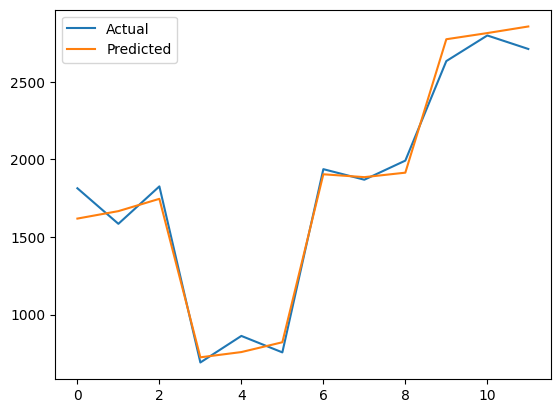

In [35]:
fb_prohet('../data/new_single_cluster_2.csv')


14:32:30 - cmdstanpy - INFO - Chain [1] start processing


14:32:30 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1823
32 2014-09-01  2054
33 2014-10-01  2719
34 2014-11-01  2791
35 2014-12-01  2746
           ds     y
36 2015-01-01  1718
37 2015-02-01  1729
38 2015-03-01  1827
39 2015-04-01   787
40 2015-05-01   835
MAE: 46.361
RMSE: 51.375


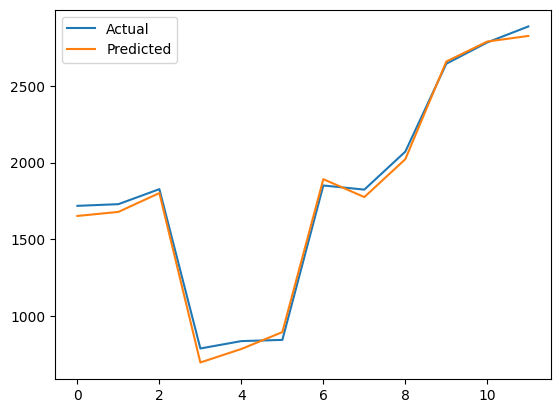

In [36]:
fb_prohet('../data/new_single_cluster_22.csv')


14:32:31 - cmdstanpy - INFO - Chain [1] start processing
14:32:31 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1914
32 2014-09-01  2037
33 2014-10-01  2723
34 2014-11-01  2787
35 2014-12-01  2876
           ds     y
36 2015-01-01  1775
37 2015-02-01  1797
38 2015-03-01  1806
39 2015-04-01   774
40 2015-05-01   872
MAE: 65.871
RMSE: 81.007


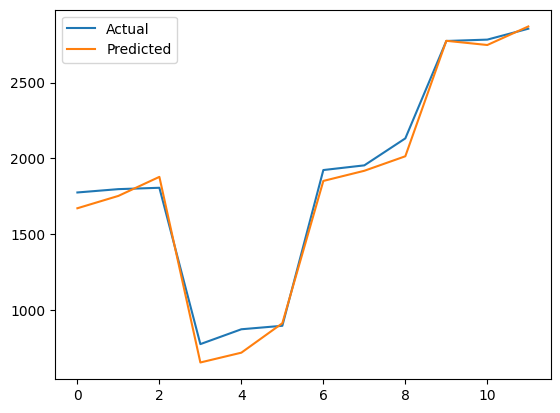

In [37]:
fb_prohet('../data/new_single_cluster_222.csv')


14:32:31 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
31 2014-08-01  1851
32 2014-09-01  2094
33 2014-10-01  2736
34 2014-11-01  2789
35 2014-12-01  2895
           ds     y
36 2015-01-01  1778
37 2015-02-01  1796
38 2015-03-01  1892
39 2015-04-01   718
40 2015-05-01   848


14:32:32 - cmdstanpy - INFO - Chain [1] done processing


MAE: 45.763
RMSE: 59.033


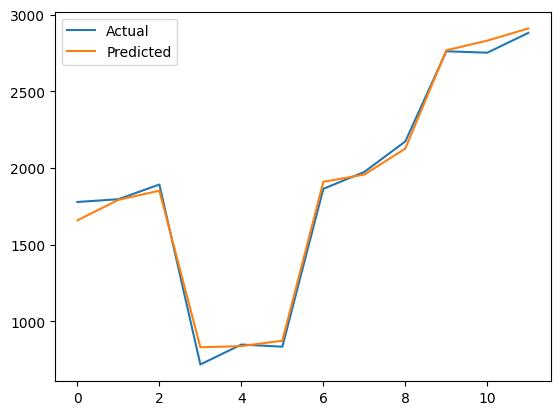

In [38]:
fb_prohet('../data/new_single_cluster_2222.csv')


14:32:32 - cmdstanpy - INFO - Chain [1] start processing


14:32:32 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
31 2014-08-01  1968
32 2014-09-01  2048
33 2014-10-01  2694
34 2014-11-01  2853
35 2014-12-01  2896
           ds     y
36 2015-01-01  1763
37 2015-02-01  1789
38 2015-03-01  1885
39 2015-04-01   781
40 2015-05-01   819
MAE: 71.278
RMSE: 83.194


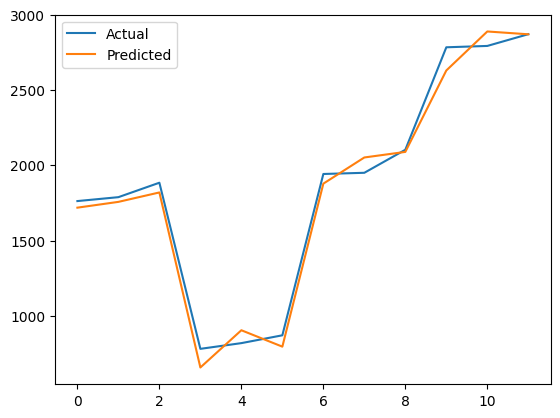

In [39]:
fb_prohet('../data/new_single_cluster_22222.csv')